## Training of CIFAR-10 using 110-layer ResNet with constant depth

In [ ]:
import tensorflow as tf
import numpy as np
from utils.neuralnets.ResNet110 import ResNet110
import time
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,Input,Flatten,Dense
from tensorflow.keras import Model

In [2]:
##load data and standardize cifar10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = (x_train - np.mean(x_train,axis=0))/np.std(x_train,axis=0)
x_test = (x_test - np.mean(x_test,axis=0))/np.std(x_test,axis=0)
##train validation split, 45000 for training and 5000 for validation
np.random.seed(42)
mask_val = np.random.choice(50000,5000,replace=False)
mask_train = np.array([i for i in range(50000) if i not in mask_val])
x_val, y_val = x_train[mask_val], y_train[mask_val]
x_train, y_train = x_train[mask_train], y_train[mask_train]

In [3]:
##data augmentation
##augmented with horizontal flip,random erasing and random shift by 0.1
# def randomErasing(x, cut_size=16):
#     x = np.copy(x)
#     fill = x.mean()

#     h, w, _ = x.shape
#     top = np.random.randint(0 - cut_size // 2, h - cut_size)
#     left = np.random.randint(0 - cut_size // 2, w - cut_size)
#     bottom = top + cut_size
#     right = left + cut_size
#     if top < 0:
#         top = 0
#     if left < 0:
#         left = 0
#     x[top:bottom, left:right, :].fill(fill)
#     return x
batch_size = 128
datagen_for_train = ImageDataGenerator(horizontal_flip=True,width_shift_range= 4, height_shift_range= 4)
datagen_for_test = ImageDataGenerator()
train_data = datagen_for_train.flow(x_train,y_train,batch_size=batch_size)
validation_data = datagen_for_test.flow(x_val, y_val, batch_size=batch_size)

In [4]:
##create a ResNet110 model
input_shape = x_train.shape[1:]
num_class = 10
model = ResNet110(input_shape=input_shape,num_class=num_class)

In [5]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1,nesterov=True)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
val_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()


epochs = 200
history = [[],[],[]]
time_0 = time.time()
for epoch in range(epochs):
    print("Epoch %d/%d" % (epoch+1,epochs))
    if (epoch==100) | (epoch==150):
        optimizer.learning_rate = optimizer.learning_rate/10
    
    start_time = time.time()
    step = 0
    for x_batch_train, y_batch_train in train_data:
        with tf.GradientTape() as tape:
            logits = model(x_batch_train, training=True)
            loss_value = loss_fn(y_batch_train, logits)
        grads = tape.gradient(loss_value, model.trainable_weights)
        optimizer.apply_gradients(zip(grads, model.trainable_weights))
        train_acc_metric.update_state(y_batch_train, logits)
        if step % 100 == 0:
            print(
                "Training loss at step %d: %.4f"
                % (step, float(loss_value))
            )
        step += 1
        if step > len(x_train)/batch_size:
            break

    history[0].append(loss_value.numpy())
    train_acc = train_acc_metric.result()
    train_acc_metric.reset_states()
    
    step = 0
    for x_batch_val, y_batch_val in validation_data:
        val_logits = model(x_batch_val, training=False)
        val_acc_metric.update_state(y_batch_val, val_logits)
        step += 1
        if step > len(x_val)/batch_size:
            break
    val_acc = val_acc_metric.result()
    val_acc_metric.reset_states()
    history[1].append(train_acc.numpy())
    history[2].append(val_acc.numpy())
    print("Training accuracy: %.4f" % (float(train_acc),)
          ,"Validation accuracy: %.4f" % (float(val_acc),),"Time taken: %.2fs" % (time.time() - start_time))
total_time=time.time()-time_0

Epoch 1/200
Training loss at step 0: 10.1663
Training loss at step 100: 2.1765
Training loss at step 200: 2.0896
Training loss at step 300: 1.9884
Training accuracy: 0.2155 Validation accuracy: 0.2412 Time taken: 133.28s
Epoch 2/200
Training loss at step 0: 1.9539
Training loss at step 100: 1.7224
Training loss at step 200: 1.7275
Training loss at step 300: 1.6132
Training accuracy: 0.3532 Validation accuracy: 0.3948 Time taken: 127.62s
Epoch 3/200
Training loss at step 0: 1.6383
Training loss at step 100: 1.5576
Training loss at step 200: 1.5411
Training loss at step 300: 1.3775
Training accuracy: 0.4372 Validation accuracy: 0.4698 Time taken: 126.92s
Epoch 4/200
Training loss at step 0: 1.3810
Training loss at step 100: 1.4250
Training loss at step 200: 1.2638
Training loss at step 300: 1.3891
Training accuracy: 0.4964 Validation accuracy: 0.4476 Time taken: 127.18s
Epoch 5/200
Training loss at step 0: 1.3492
Training loss at step 100: 1.2902
Training loss at step 200: 1.2527
Trainin

Training loss at step 100: 0.1918
Training loss at step 200: 0.1783
Training loss at step 300: 0.3194
Training accuracy: 0.8994 Validation accuracy: 0.7776 Time taken: 124.79s
Epoch 39/200
Training loss at step 0: 0.2797
Training loss at step 100: 0.2272
Training loss at step 200: 0.2617
Training loss at step 300: 0.3087
Training accuracy: 0.9039 Validation accuracy: 0.8344 Time taken: 124.72s
Epoch 40/200
Training loss at step 0: 0.3150
Training loss at step 100: 0.2466
Training loss at step 200: 0.2887
Training loss at step 300: 0.3186
Training accuracy: 0.9068 Validation accuracy: 0.8156 Time taken: 125.33s
Epoch 41/200
Training loss at step 0: 0.3470
Training loss at step 100: 0.3342
Training loss at step 200: 0.2608
Training loss at step 300: 0.2427
Training accuracy: 0.9061 Validation accuracy: 0.7912 Time taken: 125.59s
Epoch 42/200
Training loss at step 0: 0.2840
Training loss at step 100: 0.2318
Training loss at step 200: 0.2509
Training loss at step 300: 0.3523
Training accur

Training loss at step 200: 0.0945
Training loss at step 300: 0.0923
Training accuracy: 0.9650 Validation accuracy: 0.8498 Time taken: 123.20s
Epoch 76/200
Training loss at step 0: 0.1747
Training loss at step 100: 0.1109
Training loss at step 200: 0.1068
Training loss at step 300: 0.0872
Training accuracy: 0.9659 Validation accuracy: 0.8516 Time taken: 122.68s
Epoch 77/200
Training loss at step 0: 0.0723
Training loss at step 100: 0.1560
Training loss at step 200: 0.1156
Training loss at step 300: 0.1487
Training accuracy: 0.9644 Validation accuracy: 0.8198 Time taken: 123.58s
Epoch 78/200
Training loss at step 0: 0.1266
Training loss at step 100: 0.0622
Training loss at step 200: 0.0972
Training loss at step 300: 0.1108
Training accuracy: 0.9668 Validation accuracy: 0.8116 Time taken: 124.64s
Epoch 79/200
Training loss at step 0: 0.1646
Training loss at step 100: 0.0389
Training loss at step 200: 0.1630
Training loss at step 300: 0.0791
Training accuracy: 0.9692 Validation accuracy: 0

Training loss at step 300: 0.0124
Training accuracy: 0.9965 Validation accuracy: 0.8986 Time taken: 122.82s
Epoch 113/200
Training loss at step 0: 0.0456
Training loss at step 100: 0.0365
Training loss at step 200: 0.0277
Training loss at step 300: 0.0023
Training accuracy: 0.9958 Validation accuracy: 0.9004 Time taken: 123.89s
Epoch 114/200
Training loss at step 0: 0.0044
Training loss at step 100: 0.0249
Training loss at step 200: 0.0039
Training loss at step 300: 0.0186
Training accuracy: 0.9961 Validation accuracy: 0.8982 Time taken: 122.91s
Epoch 115/200
Training loss at step 0: 0.0118
Training loss at step 100: 0.0075
Training loss at step 200: 0.0046
Training loss at step 300: 0.0152
Training accuracy: 0.9963 Validation accuracy: 0.8996 Time taken: 122.27s
Epoch 116/200
Training loss at step 0: 0.0013
Training loss at step 100: 0.0077
Training loss at step 200: 0.0062
Training loss at step 300: 0.0212
Training accuracy: 0.9960 Validation accuracy: 0.9018 Time taken: 122.71s
Epoc

Training loss at step 300: 0.0054
Training accuracy: 0.9980 Validation accuracy: 0.9000 Time taken: 124.45s
Epoch 150/200
Training loss at step 0: 0.0052
Training loss at step 100: 0.0238
Training loss at step 200: 0.0103
Training loss at step 300: 0.0014
Training accuracy: 0.9979 Validation accuracy: 0.9000 Time taken: 126.47s
Epoch 151/200
Training loss at step 0: 0.0050
Training loss at step 100: 0.0112
Training loss at step 200: 0.0022
Training loss at step 300: 0.0021
Training accuracy: 0.9980 Validation accuracy: 0.9006 Time taken: 123.11s
Epoch 152/200
Training loss at step 0: 0.0037
Training loss at step 100: 0.0112
Training loss at step 200: 0.0007
Training loss at step 300: 0.0008
Training accuracy: 0.9980 Validation accuracy: 0.9006 Time taken: 123.58s
Epoch 153/200
Training loss at step 0: 0.0086
Training loss at step 100: 0.0070
Training loss at step 200: 0.0052
Training loss at step 300: 0.0057
Training accuracy: 0.9980 Validation accuracy: 0.9002 Time taken: 122.61s
Epoc

Training loss at step 300: 0.0055
Training accuracy: 0.9984 Validation accuracy: 0.9000 Time taken: 123.71s
Epoch 187/200
Training loss at step 0: 0.0027
Training loss at step 100: 0.0005
Training loss at step 200: 0.0045
Training loss at step 300: 0.0082
Training accuracy: 0.9981 Validation accuracy: 0.9006 Time taken: 123.57s
Epoch 188/200
Training loss at step 0: 0.0041
Training loss at step 100: 0.0017
Training loss at step 200: 0.0034
Training loss at step 300: 0.0054
Training accuracy: 0.9982 Validation accuracy: 0.8998 Time taken: 123.14s
Epoch 189/200
Training loss at step 0: 0.0034
Training loss at step 100: 0.0087
Training loss at step 200: 0.0025
Training loss at step 300: 0.0054
Training accuracy: 0.9986 Validation accuracy: 0.8998 Time taken: 123.49s
Epoch 190/200
Training loss at step 0: 0.0068
Training loss at step 100: 0.0006
Training loss at step 200: 0.0018
Training loss at step 300: 0.0031
Training accuracy: 0.9986 Validation accuracy: 0.9010 Time taken: 123.29s
Epoc

In [6]:
log = np.array(history)
np.save("./Logs/ResNet110_cifar10",log)

In [7]:
with open('./Logs/ResNet110_cifar10.npy', 'rb') as f:
     log = np.load(f)

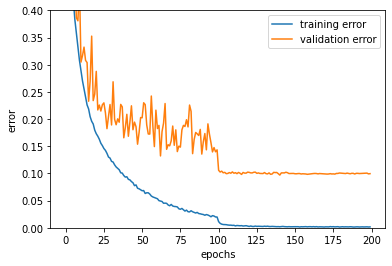

In [8]:
import matplotlib.pyplot as plt
plt.plot(1-log[1],label='training error')
plt.plot(1-log[2],label='validation error')
plt.ylim(0,0.4)
plt.xlabel('epochs')
plt.ylabel('error')
plt.legend()

In [9]:
y_pred = model.predict(x_test)
m = tf.keras.metrics.SparseCategoricalAccuracy()
m.update_state(y_test, y_pred)
m.result().numpy()

0.8907

In [10]:
total_time

24874.805114269257